In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet


In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
data= pd.read_csv("covid_19_india.csv")
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [5]:
data.isnull().sum()

Sno                         28
Date                        28
Time                        28
State/UnionTerritory        28
ConfirmedIndianNational     28
ConfirmedForeignNational    28
Cured                       28
Deaths                      28
Confirmed                   28
dtype: int64

In [6]:
data.drop(['ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)

In [7]:
data.shape

(15114, 7)

In [8]:
data.head()

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,0.0,0.0,3.0


# Comparision between Recovery and Deaths


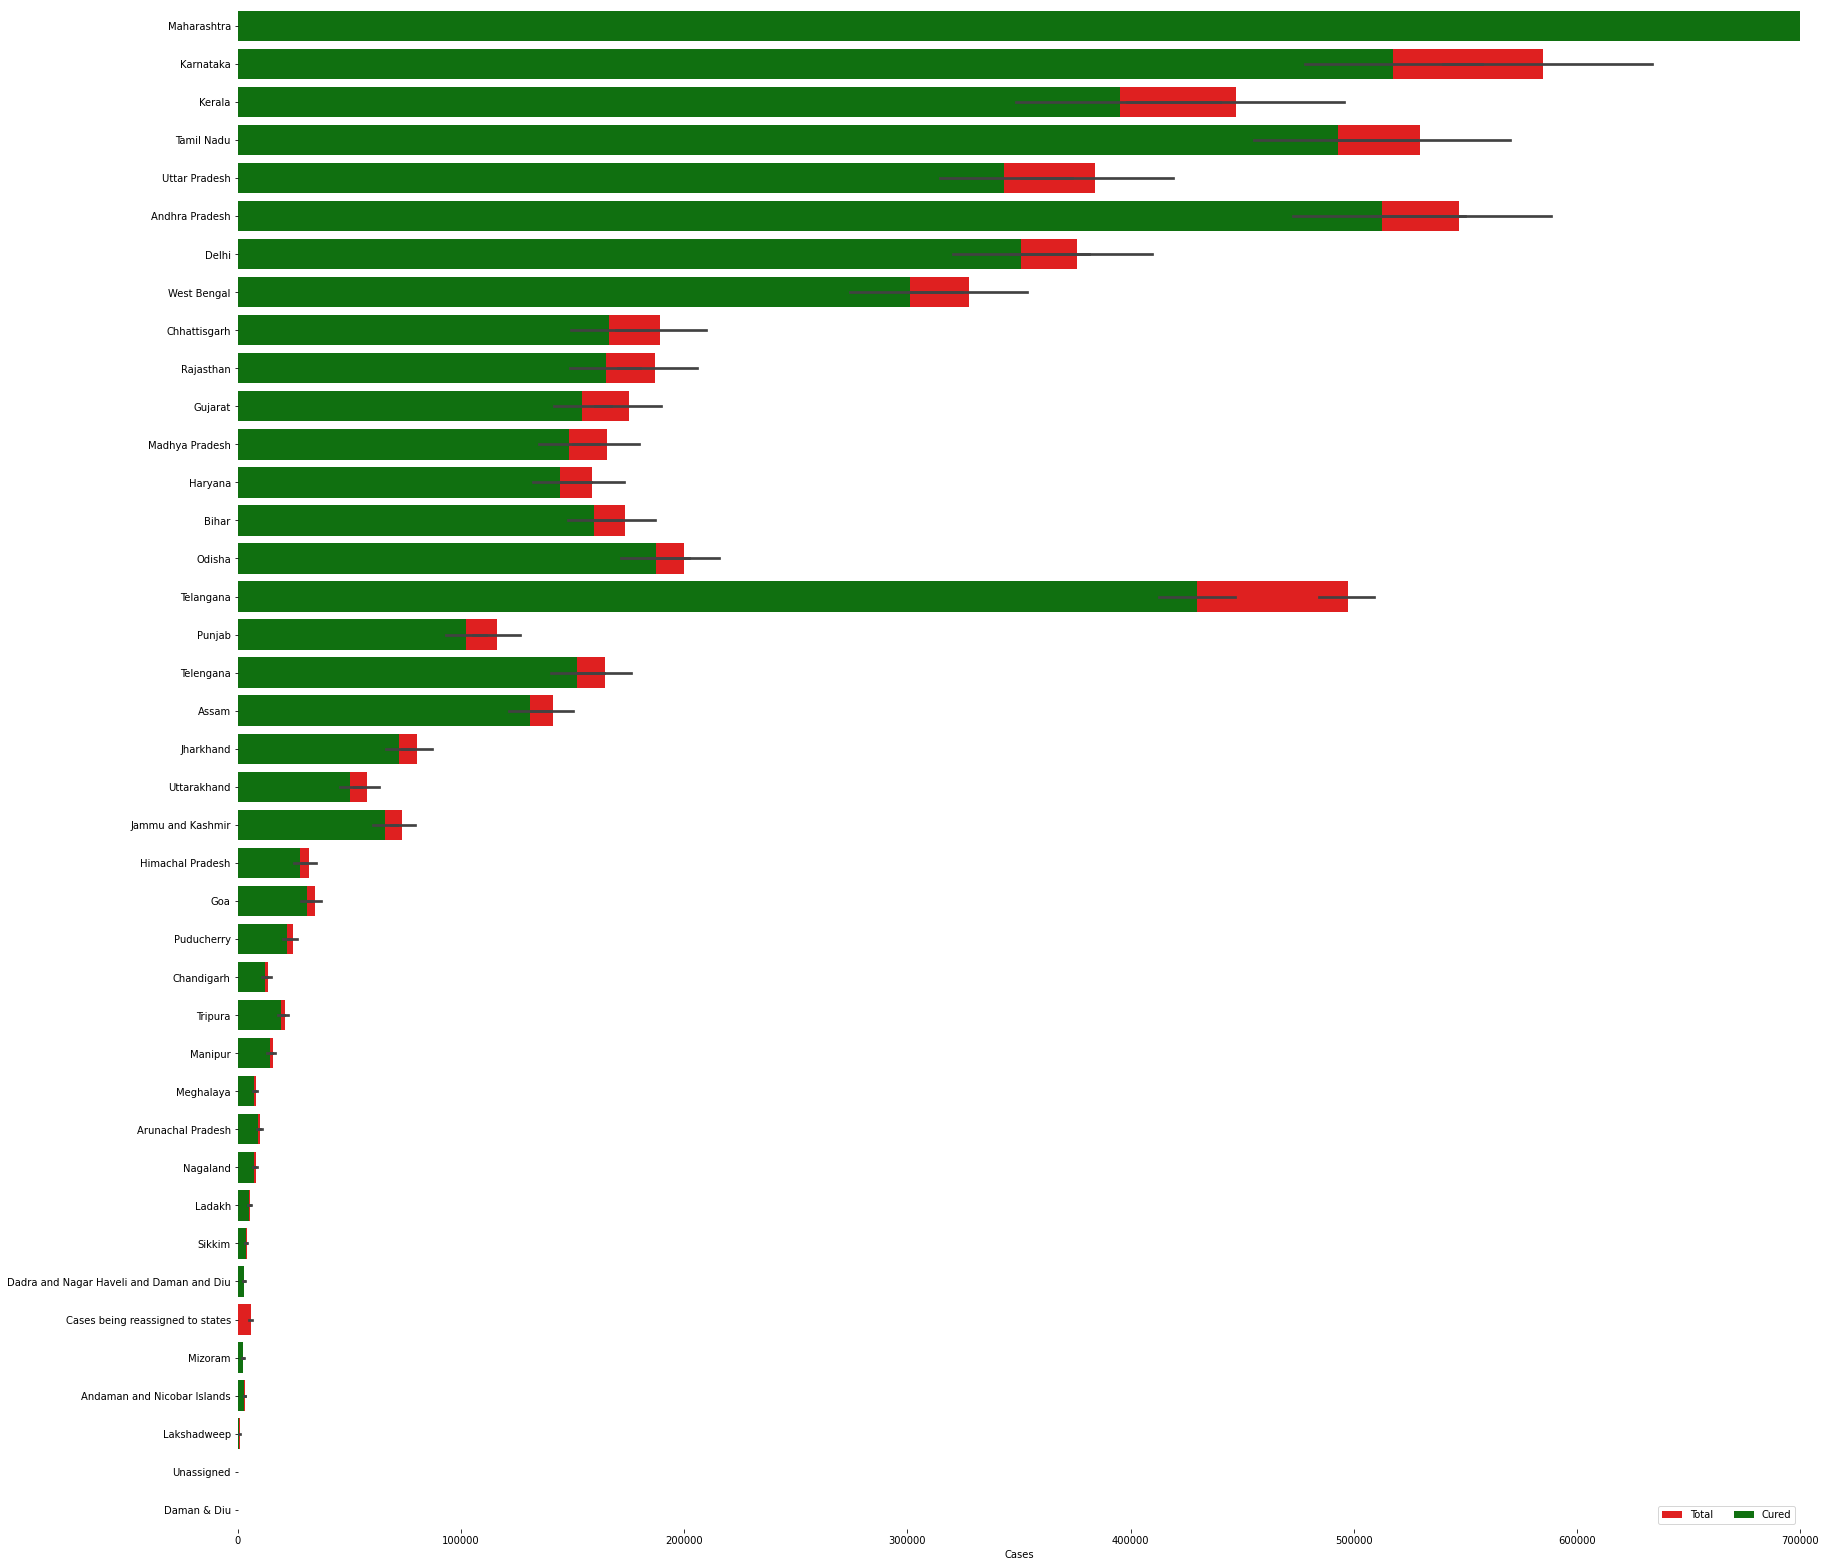

In [9]:
f, ax = plt.subplots(figsize=(28, 28))
d = data[['State/UnionTerritory','Confirmed','Cured','Deaths']]   
d.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x='Confirmed', y="State/UnionTerritory", data=d,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=d, label="Cured", color="green")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 700000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [10]:
data['Date'] = pd.to_datetime(data['Date'],dayfirst = True)

# Number of Confirmed Cases,Recoveries and Deaths

In [11]:
data_confirmed_india=data.groupby('Date')['Confirmed'].sum().reset_index()
data_cured_india=data.groupby('Date')['Cured'].sum().reset_index()
data_death_india=data.groupby('Date')['Deaths'].sum().reset_index()


In [12]:
print("The Confirmed Cases are",data_confirmed_india.Confirmed.max())
print("The Recovered Cases are",data_cured_india.Cured.max())
print("The Deaths Cases are",data_death_india.Deaths.max())

The Confirmed Cases are 25496330.0
The Recovered Cases are 21986363.0
The Deaths Cases are 283248.0


# Confirmed Day Wise Cases


In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_confirmed_india['Date'], y = data_confirmed_india['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()



In [14]:
import plotly.express as px
fig = px.bar(data_confirmed_india, x="Date", y="Confirmed", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='light blue')
fig.show()

# Deaths Day Wise

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_death_india['Date'], y = data_death_india['Deaths'], mode='lines+markers',name='Total Deaths',line=dict(color='Red', width=2)))
fig.update_layout(title_text='Trend of Death Cases in India',plot_bgcolor='rgb(230, 230, 230)')
fig.show()


In [16]:

import plotly.express as px
fig = px.bar(data_death_india, x="Date", y="Deaths", barmode='group', height=500)
fig.update_layout(title_text='Coronavirus Deaths in India on daily basis',plot_bgcolor='light blue')
fig.show()


# Day Wise Confirmed,Cured,Deaths

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_confirmed_india['Date'], y=data_confirmed_india['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=data_death_india['Date'], y=data_death_india['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=data_cured_india['Date'], y=data_cured_india['Cured'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='India COVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()

# State Wise Cases and Recovery

In [18]:
import numpy as np
state_cases = data.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+ state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)

In [19]:
state_cases.head()

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
0,Andaman and Nicobar Islands,6674.0,92.0,6359.0,223.0,1.38,95.28
1,Andhra Pradesh,1475372.0,9580.0,1254291.0,211501.0,0.65,85.02
2,Arunachal Pradesh,22462.0,88.0,19977.0,2397.0,0.39,88.94
3,Assam,340858.0,2344.0,290774.0,47740.0,0.69,85.31
4,Bihar,664115.0,4039.0,595377.0,64699.0,0.61,89.65


In [20]:
state_cases['State/UnionTerritory'].unique() #Names of States/Union Teritories


array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar',
       'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Telengana', 'Tripura', 'Unassigned', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [21]:
state_cases['State/UnionTerritory'].nunique() #Number of States/Union Teritories

40

# Now let's Analyze the Confirmed,Recovered and Deaths on Each State

In [22]:
state_wise_cases=state_cases.sort_values('Confirmed', ascending= False).fillna(0).style
                        .background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Oranges',subset=["Active"])\
                        .background_gradient(cmap='RdYlBu',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Accent',subset=["Cure Rate (per 100)"])

In [23]:
state_wise_cases

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
22,Maharashtra,5433506.000000,83777.000000,4927480.000000,422249.000000,1.540000,90.690000
17,Karnataka,2272374.000000,22838.000000,1674487.000000,575049.000000,1.010000,73.690000
18,Kerala,2200706.000000,6612.000000,1846105.000000,347989.000000,0.300000,83.890000
32,Tamil Nadu,1664350.000000,18369.000000,1403052.000000,242929.000000,1.100000,84.300000
37,Uttar Pradesh,1637663.000000,18072.000000,1483249.000000,136342.000000,1.100000,90.570000
1,Andhra Pradesh,1475372.000000,9580.000000,1254291.000000,211501.000000,0.650000,85.020000
10,Delhi,1402873.000000,22111.000000,1329899.000000,50863.000000,1.580000,94.800000
39,West Bengal,1171861.000000,13576.000000,1026492.000000,131793.000000,1.160000,87.600000
7,Chhattisgarh,925531.000000,12036.000000,823113.000000,90382.000000,1.300000,88.930000
30,Rajasthan,879664.000000,7080.000000,713129.000000,159455.000000,0.800000,81.070000


# Most Affected States

In [24]:
px.treemap(state_cases,path=["State/UnionTerritory"],values="Deaths",title="Overall States Comparision of deaths")

# Fatality Ratio


In [25]:
data['Fatality-Ratio'] = data['Deaths']/data['Confirmed']

In [26]:
data['Fatality-Ratio']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15109    NaN
15110    NaN
15111    NaN
15112    NaN
15113    NaN
Name: Fatality-Ratio, Length: 15114, dtype: float64

# Fatality Ratio Among States

In [27]:
fatality_ratio=data.groupby('State/UnionTerritory')['Fatality-Ratio'].sum().reset_index()
fatality_ratio.iplot(kind='line',mode='lines+markers',x='State/UnionTerritory',y='Fatality-Ratio',
                     title='Fatality-Ratio Among States',color='blue')

# Fatality Ratio in a year

In [28]:
fatality_year=data.groupby('Date')['Fatality-Ratio'].sum().reset_index()
fatality_year.iplot(kind='line',x='Date',y='Fatality-Ratio')

# Top 10 States with Highest Confirmed Cases

In [29]:
top_10=state_cases.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values(ascending=False).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["State/UnionTerritory","Confirmed Cases"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['State/UnionTerritory'].head(10),top_10['Confirmed'].head(10)],
               fill = dict(color = ['#25FEFD', 'white']),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['State/UnionTerritory'].head(10),
                y=top_10['Confirmed'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='blue'),opacity=0.60)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 States with Highest No. of Cases',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

# Top 10 States with Highest Recovery

In [30]:
top_10=state_cases.groupby('State/UnionTerritory')['Cured'].sum().sort_values(ascending=False).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["State/UnionTerritory","Cured Cases"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['State/UnionTerritory'].head(10),top_10['Cured'].head(10)],
               fill = dict(color = ['lime', 'white']),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['State/UnionTerritory'].head(10),
                y=top_10['Cured'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='lime'),opacity=0.60)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 States with Highest Recovery',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

# Top 10 States with Highest Deaths

In [31]:
top_10=state_cases.groupby('State/UnionTerritory')['Deaths'].sum().sort_values(ascending=False).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["State/UnionTerritory","Deaths Cases"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['State/UnionTerritory'].head(10),top_10['Deaths'].head(10)],
               fill = dict(color = ['salmon', 'white']),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['State/UnionTerritory'].head(10),
                y=top_10['Deaths'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='darkred'),opacity=0.60)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 States with Highest No. of Cases',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

# TestingDetails

In [32]:
data_testing=pd.read_csv("StatewiseTestingDetails.csv")

In [33]:
data_testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


#State-Wise Sample Collections


In [34]:
data_sample=data_testing.groupby('State')['TotalSamples'].sum().sort_values(ascending=False).reset_index()

In [35]:
data_sample.head()

,State,TotalSamples
0,Uttar Pradesh,7.539602e+09
1,Bihar,5.184391e+09
2,Maharashtra,4.545683e+09
3,Tamil Nadu,4.523019e+09
4,Karnataka,4.495649e+09


#Top 10 States with most Samples Collected

In [36]:
px.bar(data_sample.head(10),x='State',y='TotalSamples')

In [37]:
data_positive=data_testing.groupby('State')['Positive'].sum().sort_values(ascending=False).reset_index()

# Positive Cases

In [38]:
data_positive.head(10).iplot(kind='bar',x='State',y='Positive')

# VACCINATION DETAILS

In [39]:
data_vaccine=pd.read_csv('covid_vaccine_statewise.csv')

In [40]:
data_vaccine.head()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [41]:
data_vaccine.columns

Index(['Updated On', 'State', 'Total Individuals Vaccinated',
       'Total Sessions Conducted', 'Total Sites ', 'First Dose Administered',
       'Second Dose Administered', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Covaxin Administered', 'Total CoviShield Administered',
       'Total Sputnik V Administered', 'AEFI', '18-45 years (Age)',
       '45-60 years (Age)', '60+ years (Age)', 'Total Doses Administered'],
      dtype='object')

In [42]:
male = data_vaccine["Male(Individuals Vaccinated)"].sum() 
female = data_vaccine["Female(Individuals Vaccinated)"].sum()  
trans = data_vaccine["Transgender(Individuals Vaccinated)"].sum()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],
       title="Male and Female Vaccinated ratio for Covid19")

# Covishied or Covaxin

In [43]:
Covaxin = data_vaccine["Total Covaxin Administered"].sum() 
Covishield = data_vaccine["Total CoviShield Administered"].sum()  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxin,Covishield],
       title="Covaxin and Covishield Vaccination")

# Doses Administered VS People Vaccinated

In [44]:
Doses = data_vaccine["Total Doses Administered"].sum() 
Vaccinated = data_vaccine["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],
       title="Doses administered vs People Vaccinated")

In [45]:
data_vaccine.head()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [46]:
data_vaccine['State'].unique()

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

# Let's Analayse For Karnataka, Maharastra,Delhi

In [47]:
data_Karnataka=data_vaccine[data_vaccine['State']=='Karnataka']
data_Maharashtra=data_vaccine[data_vaccine['State']=='Maharashtra']
data_Delhi=data_vaccine[data_vaccine['State']=='Delhi']

In [48]:
Doses = data_Karnataka["Total Doses Administered"].sum() 
Vaccinated = data_Karnataka["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],
       title="Doses administered vs People Vaccinated")

In [49]:
Doses = data_Maharashtra["Total Doses Administered"].sum() 
Vaccinated = data_Maharashtra["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],
       title="Doses administered vs People Vaccinated")

In [50]:
Doses = data_Delhi["Total Doses Administered"].sum() 
Vaccinated = data_Maharashtra["Total Individuals Vaccinated"].sum()  

px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],
       title="Doses administered vs People Vaccinated")

In [51]:
data_Karnataka.iplot(kind='bar',x='Updated On',y='Total Individuals Vaccinated')

# Predictions for upcoming cases.

In [52]:
data_confirmed_india.columns = ["ds","y"]
data_confirmed_india["ds"] = pd.to_datetime(data_confirmed_india["ds"])
data_confirmed_india

,ds,y
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,2.0
3,2020-02-02,3.0
4,2020-02-03,3.0
...,...,...
471,2021-05-15,24372907.0
472,2021-05-16,24684077.0
473,2021-05-17,24965463.0
474,2021-05-18,25228996.0


In [55]:
m = Prophet(yearly_seasonality = True,daily_seasonality=True)
m.fit(data_confirmed_india)
future = m.make_future_dataframe(periods=21)
future.tail()

,ds
492,2021-06-05
493,2021-06-06
494,2021-06-07
495,2021-06-08
496,2021-06-09


In [67]:
forecast = m.predict(future)


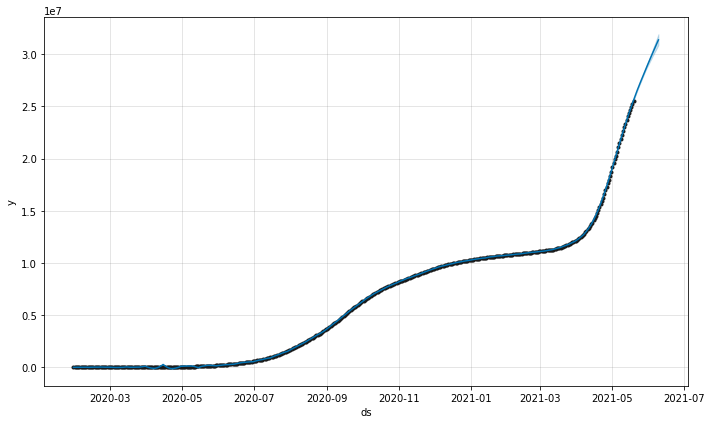

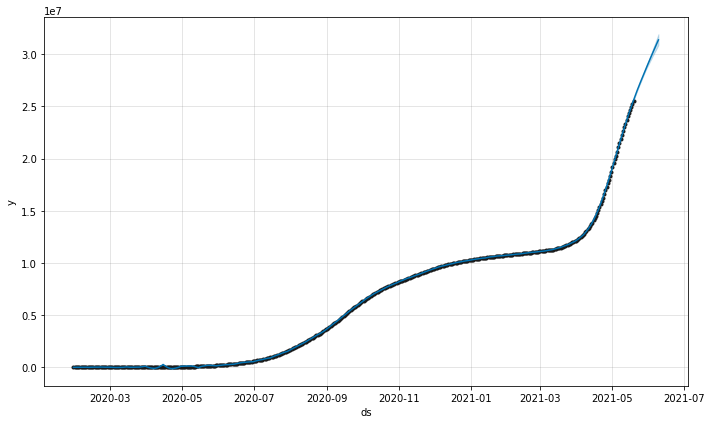

In [57]:
m.plot(forecast)

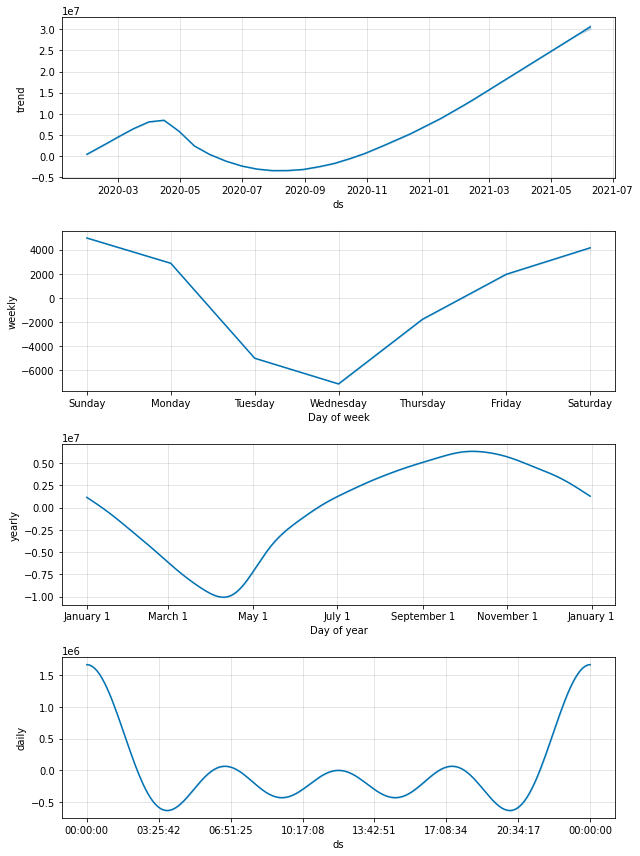

In [58]:
confirmed_forecast_plot =m.plot_components(forecast)

# Prediction for deaths due to Covid-19.

In [60]:
data_death_india.columns = ["ds","y"]
data_death_india['ds'] = pd.to_datetime(data_death_india["ds"])
data_death_india

,ds,y
0,2020-01-30,0.0
1,2020-01-31,0.0
2,2020-02-01,0.0
3,2020-02-02,0.0
4,2020-02-03,0.0
...,...,...
471,2021-05-15,266207.0
472,2021-05-16,270284.0
473,2021-05-17,274390.0
474,2021-05-18,278719.0


In [62]:
model = Prophet(yearly_seasonality = True,daily_seasonality=True)
model.fit(data_death_india)
future = model.make_future_dataframe(periods=14)
future.tail()

,ds
485,2021-05-29
486,2021-05-30
487,2021-05-31
488,2021-06-01
489,2021-06-02


In [63]:
prediction = model.predict(future)
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
485,2021-05-29,362652.536962,321365.304862,323390.579810,361681.679812,363537.456592,-40225.859646,-40225.859646,-40225.859646,15075.562375,...,40.415046,40.415046,40.415046,-55341.837067,-55341.837067,-55341.837067,0.0,0.0,0.0,322426.677315
486,2021-05-30,364363.553235,324957.969321,327506.006403,363113.223052,365510.069105,-38056.387579,-38056.387579,-38056.387579,15075.562375,...,42.535699,42.535699,42.535699,-53174.485653,-53174.485653,-53174.485653,0.0,0.0,0.0,326307.165656
487,2021-05-31,366074.569508,328603.031043,331518.961801,364499.246202,367494.959456,-35938.064269,-35938.064269,-35938.064269,15075.562375,...,2.240322,2.240322,2.240322,-51015.866966,-51015.866966,-51015.866966,0.0,0.0,0.0,330136.505239
488,2021-06-01,367785.585782,332098.341317,335728.338432,365948.003245,369538.734678,-33842.221824,-33842.221824,-33842.221824,15075.562375,...,-53.183989,-53.183989,-53.183989,-48864.600210,-48864.600210,-48864.600210,0.0,0.0,0.0,333943.363957
489,2021-06-02,369496.602055,335787.649512,339887.699114,367343.323224,371599.717727,-31673.283765,-31673.283765,-31673.283765,15075.562375,...,-29.263353,-29.263353,-29.263353,-46719.582788,-46719.582788,-46719.582788,0.0,0.0,0.0,337823.318289


<AxesSubplot:>

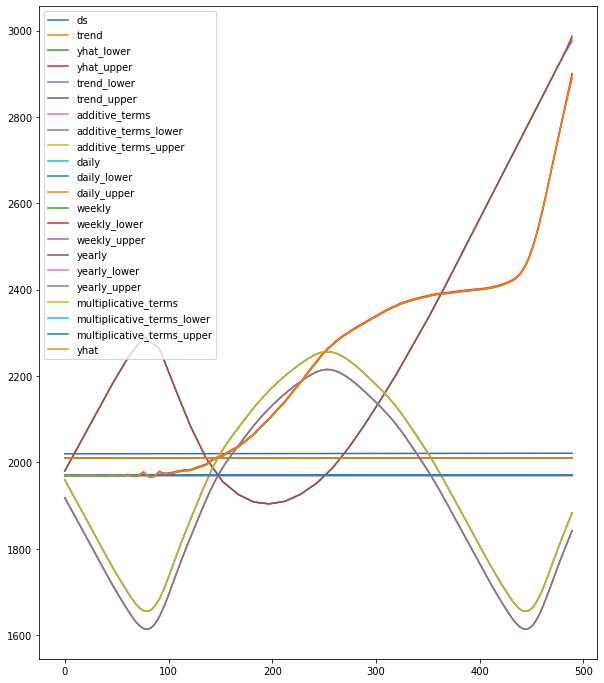

In [64]:
prediction.plot()

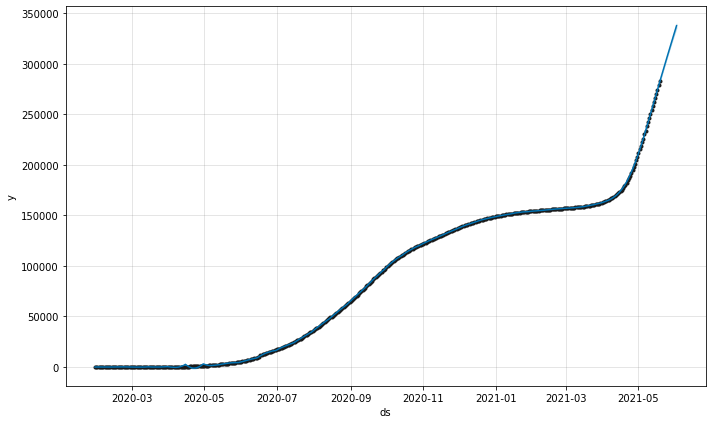

In [65]:
death_forecast_plot = model.plot(prediction)

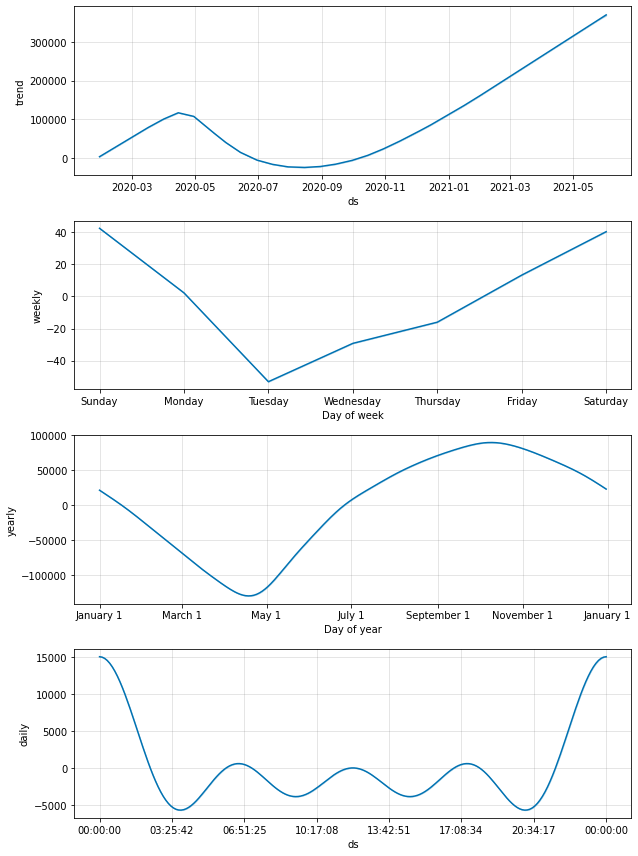

In [66]:
deaths_forecast_plot = model.plot_components(prediction)
